In [18]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
from scipy.stats import ttest_ind
from scipy import stats

## Reading data from the customer demo table

In [19]:
df1 = pd.read_csv("df_final_demo.csv")
df1

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


## Merging the 2 process tables to one, for better analysis and understanding

In [20]:
df2 = pd.read_csv('df_final_web_data_pt_1.csv')
df3 = pd.read_csv('df_final_web_data_pt_2.csv')
merged_df = pd.concat([df2, df3], ignore_index=True)
merged_df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


## Convert to one CSV file

In [21]:
merged_df.to_csv('merged_df_final_web_data.csv', index=False)

## Reading data from the variation table

In [22]:
df4 = pd.read_csv("df_final_experiment_clients.csv")
df4

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


## Create tables clearly distinguishing between categorical and numercal variables.

In [23]:
# columns_categorical= ['gendr']
# columns_numerical= ['clnt_tenure_yr'--continuous,'clnt_tenure_mnth', 'clnt_age'--continuous,'bal','calls_6_mnth','logons_6_mnth' ]

## Key demographics and behaviors of Vanguard’s online clients.

Who are the primary clients using this online process?Are the primary clients younger or older, new or long-standing?

### 1. Relation between gender and client age

/var/folders/f6/3j2ss2s17kng3g2xrm_hz4sm0000gn/T/ipykernel_34138/318929554.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='gendr', y='clnt_age', palette="coolwarm")


<Axes: xlabel='gendr', ylabel='clnt_age'>

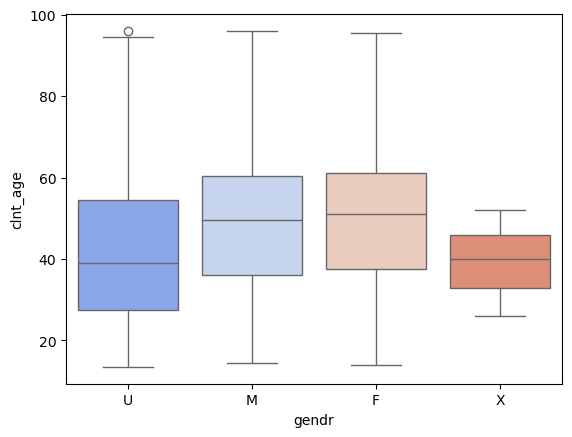

In [49]:
sns.boxplot(data=df1, x='gendr', y='clnt_age', palette="coolwarm")

In [51]:
Q1  = df1['clnt_age'].quantile(.25)
Q3  = df1['clnt_age'].quantile(.75)
IQR = Q3- Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df1[(df1['clnt_age'] >= lower_bound) & (df1['clnt_age'] <= upper_bound)]
df_filtered

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


### 2. Correlation between tenure year with other factors

In [8]:
numeric_df = df1.select_dtypes(include=[np.number])

In [9]:
spearman_correlations= numeric_df.corrwith(df1['clnt_tenure_yr'], method= 'spearman')
spearman_correlation_sorted= spearman_correlations.sort_values(ascending= False)
spearman_correlations_sorted_top = spearman_correlation_sorted[abs(spearman_correlation_sorted) > 0.1]
spearman_correlations_sorted_top

clnt_tenure_yr      1.000000
clnt_tenure_mnth    0.998103
clnt_age            0.300976
bal                 0.273492
num_accts           0.123272
dtype: float64

In [10]:
correlation_matrix = numeric_df[spearman_correlations_sorted_top.index].corr()

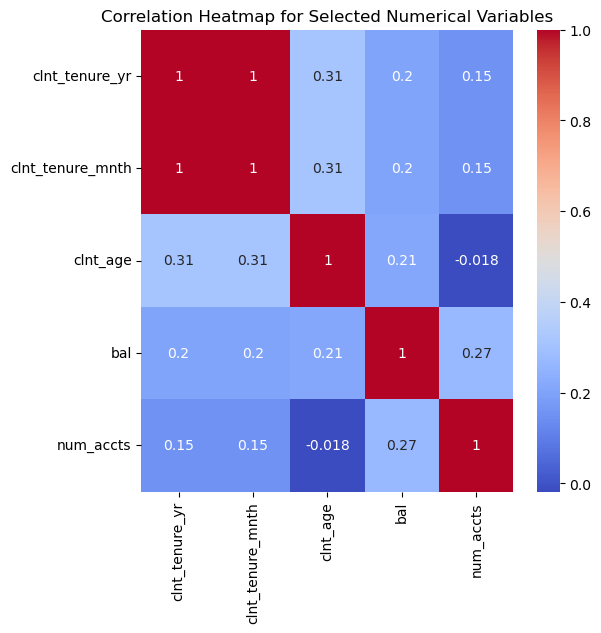

In [11]:
plt.figure(figsize=(6, 6))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

### 2.1 Relation between tenure year and client age

/var/folders/f6/3j2ss2s17kng3g2xrm_hz4sm0000gn/T/ipykernel_34138/2952791675.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df1, x='clnt_age', y='clnt_tenure_yr', ci=None)


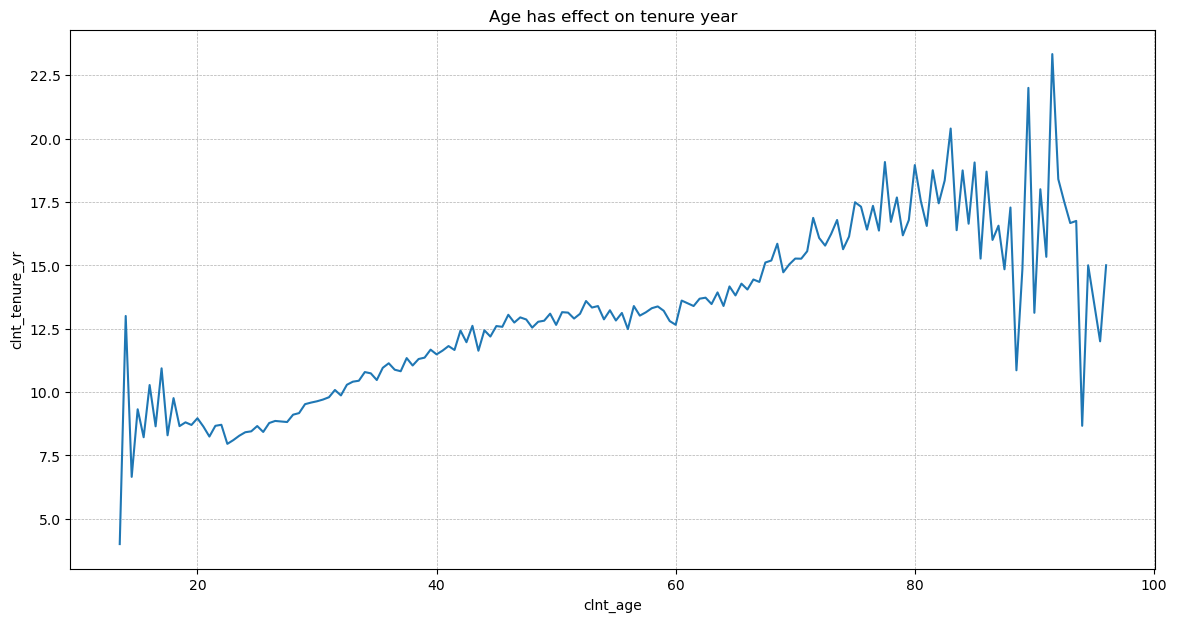

In [12]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df1, x='clnt_age', y='clnt_tenure_yr', ci=None)
plt.title('Age has effect on tenure year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

### 2.2 Relation between tenure year and gender

In [13]:
crosstab_result = pd.crosstab(df1['clnt_tenure_yr'], df1['gendr'])
crosstab_result

gendr,F,M,U,X
clnt_tenure_yr,,,,
2.0,5,10,66,0
3.0,60,49,340,0
4.0,426,405,3856,0
5.0,789,829,5337,0
6.0,575,535,5982,0
7.0,230,283,4442,0
8.0,976,1034,2035,0
9.0,1569,1619,167,2
10.0,1305,1347,123,0


<Axes: xlabel='clnt_tenure_yr'>

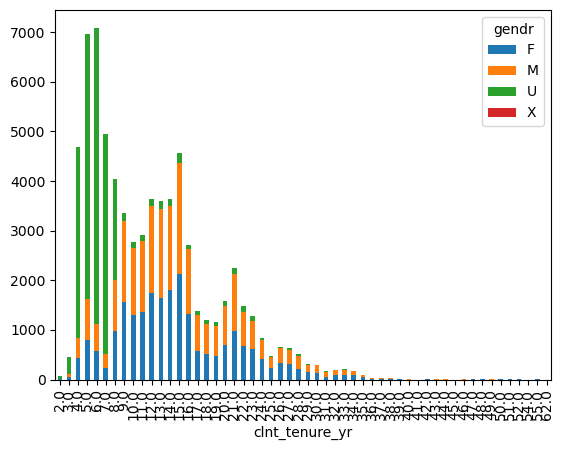

In [14]:
crosstab_result.plot(kind="bar", stacked=True)

In [25]:
df1

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


## Merging all 3 dataset into 1

In [39]:
# Reading variation table and web_data table
df4 = pd.read_csv("df_final_experiment_clients.csv")
merged_df = pd.read_csv('merged_df_final_web_data.csv')

#Merging to merged_df_final
merged_df_final = pd.merge(merged_df, df4, on='client_id', how='inner')

#converting to a csv file
merged_df_final.to_csv('merged_df_final.csv', index=False)

# Merging customer_info with merged_df_final
final_v1 = pd.merge(merged_df_final, df1, on='client_id', how='inner')



## Check null values and clean the dataframe

In [44]:
final_v1.isnull().sum()
final_v1=final_v1.dropna()

In [45]:
#converting to a csv file
final_v1.to_csv('final_v1.csv', index=False)

In [46]:
client_id_2105948_df = final[final['client_id'] == 2105948]
client_id_2105948_df


,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
56,2105948,111894218_79248359000,284161492_75966778593_698992,confirm,2017-04-05 14:04:56,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0
57,2105948,111894218_79248359000,284161492_75966778593_698992,step_3,2017-04-05 14:00:00,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0
58,2105948,111894218_79248359000,284161492_75966778593_698992,step_2,2017-04-05 13:59:46,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0
59,2105948,111894218_79248359000,284161492_75966778593_698992,step_3,2017-04-05 13:58:32,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0
60,2105948,111894218_79248359000,284161492_75966778593_698992,step_2,2017-04-05 13:57:34,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0
61,2105948,111894218_79248359000,284161492_75966778593_698992,step_1,2017-04-05 13:57:11,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0
62,2105948,111894218_79248359000,284161492_75966778593_698992,start,2017-04-05 13:44:36,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0
150,2105948,111894218_79248359000,400183608_67913149333_45420,step_1,2017-04-06 10:20:18,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0
151,2105948,111894218_79248359000,400183608_67913149333_45420,start,2017-04-06 10:19:49,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0


## Creating new data frame df_control

In [47]:
df_control = final_v1[final_v1['Variation'] == 'Control']
df_control

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
13,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
14,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
15,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
16,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
17,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417643,433098,5505424_50616523266,773565250_67577573147_389841,start,2017-05-13 15:30:47,Control,6.0,73.0,25.0,U,2.0,34419.62,2.0,5.0
417651,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
417652,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
417653,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0


In [48]:
df_control['date_time'] = pd.to_datetime(df_control['date_time'])

# Sort the DataFrame by client_id, visitor_id, and date_time
df_control = df_control.sort_values(by=['client_id', 'visitor_id', 'date_time'])

# Initialize lists to store new dataframe data
new_data = []

# Dictionary to store start times, end times, and last step
client_data = {}

# Iterate over rows to collect start and confirm times, last step, and calculate other needed data
for index, row in df_control.iterrows():
    client_id = row['client_id']
    visitor_id = row['visitor_id']
    
    if (client_id, visitor_id) not in client_data:
        client_data[(client_id, visitor_id)] = {
            'start_time': None,
            'confirm_time': None,
            'last_step': None,
            'steps': [],
            'age': row['clnt_age'],
            'clnt_tenure': f"{int(row['clnt_tenure_yr'])} years "
        }
    
    step = row['process_step']
    timestamp = row['date_time']
    
    if step == 'start':
        client_data[(client_id, visitor_id)]['start_time'] = timestamp
    elif step == 'confirm':
        client_data[(client_id, visitor_id)]['confirm_time'] = timestamp
    else:
        client_data[(client_id, visitor_id)]['steps'].append((step, timestamp))
    
    if step != 'start':
        client_data[(client_id, visitor_id)]['last_step'] = step

# Process the collected data
for (client_id, visitor_id), data in client_data.items():
    start_time = data['start_time']
    confirm_time = data['confirm_time']
    last_step = data['last_step']
    steps = data['steps']
    
    if start_time is not None and confirm_time is not None:
        completed = 'yes'
        duration = round((confirm_time - start_time).total_seconds() / 60.0, 2)
        last_step = 'confirm'
    else:
        completed = 'no'
        if steps:
            duration = round((steps[-1][1] - start_time).total_seconds() / 60.0, 2) if start_time else None
        else:
            duration = None
    
    new_data.append([client_id, visitor_id, completed, duration, data['age'], data['clnt_tenure'], last_step])

# Create new DataFrame
control_df = pd.DataFrame(new_data, columns=['client_id', 'visitor_id', 'completed', 'duration', 'age', 'clnt_tenure', 'last_step'])
control_df

/var/folders/f6/3j2ss2s17kng3g2xrm_hz4sm0000gn/T/ipykernel_34138/3299111634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control['date_time'] = pd.to_datetime(df_control['date_time'])


,client_id,visitor_id,completed,duration,age,clnt_tenure,last_step
0,1028,42237450_62128060588,no,8.97,36.0,12 years,step_1
1,1104,194240915_18158000533,no,NaN,48.0,5 years,None
2,1186,446844663_31615102958,no,0.37,22.0,8 years,step_2
3,1195,766842522_69992551638,yes,4.08,54.5,21 years,confirm
4,1197,753759429_54481946928,yes,1.58,28.5,7 years,confirm
...,...,...,...,...,...,...,...
26346,9997391,494669706_3354361161,no,3.72,60.0,4 years,step_3
26347,9997470,395791369_55562604618,yes,1.03,36.0,6 years,confirm
26348,9997470,91394485_75296404278,no,NaN,36.0,6 years,None
26349,9998346,292425655_16607136645,yes,12.47,61.5,50 years,confirm


## Filtering out process 'complete' and adding columns 'last step' to a new dataframe for df_control

In [ ]:


# Convert date_time to datetime
df_control['date_time'] = pd.to_datetime(df_control['date_time'])

# Initialize lists to store new dataframe data
new_data = []

# Dictionary to store start times, end times, and last step
client_data = {}

# Iterate over rows to collect start and confirm times, last step, and calculate other needed data
for index, row in df_control.iterrows():
    client_id = row['client_id']
    visit_id = row['visit_id']
    
    if (client_id, visit_id) not in client_data:
        client_data[(client_id, visit_id)] = {
            'start_time': None,
            'confirm_time': None,
            'last_step': None,
            'age': row['clnt_age'],
            'clnt_tenure': f"{int(row['clnt_tenure_yr'])} years "
        }
    
    if row['process_step'] == 'start':
        client_data[(client_id, visit_id)]['start_time'] = row['date_time']
    elif row['process_step'] == 'confirm':
        client_data[(client_id, visit_id)]['confirm_time'] = row['date_time']
    else:
        client_data[(client_id, visit_id)]['last_step'] = row['process_step']

# Process the collected data
for (client_id, visit_id), data in client_data.items():
    start_time = data['start_time']
    confirm_time = data['confirm_time']
    last_step = data['last_step']
    
    if start_time is not None and confirm_time is not None:
        completed_numeric = 1  # 'yes' -> 1
        completed_text = 'yes'
        duration = (confirm_time - start_time).total_seconds()
        last_step = 'confirm'
    else:
        completed_numeric = 0  # 'no' -> 0
        completed_text = 'no'
        duration = None
    
    new_data.append([client_id, visit_id, completed_numeric, completed_text, duration, data['age'], data['clnt_tenure'], last_step])

# Create new DataFrame
new_df_control = pd.DataFrame(new_data, columns=['client_id', 'visit_id', 'completed_numeric', 'completed_text', 'duration', 'age', 'clnt_tenure', 'last_step'])
new_df_control.head(20)

/var/folders/f6/3j2ss2s17kng3g2xrm_hz4sm0000gn/T/ipykernel_25661/3183617057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control['date_time'] = pd.to_datetime(df_control['date_time'])


,client_id,visit_id,completed_numeric,completed_text,duration,age,clnt_tenure,last_step
0,4033851,949661017_22392791362_127391,1,yes,1492.0,63.5,12 years,confirm
1,9294070,116640698_27328181095_188045,0,no,NaN,29.0,5 years,None
2,6651403,754106292_61370647593_160929,1,yes,621.0,56.5,13 years,confirm
3,2105948,284161492_75966778593_698992,1,yes,1220.0,61.5,6 years,confirm
4,9814849,912594178_11107066778_946103,1,yes,380.0,32.5,12 years,confirm
5,7286739,841652923_56424358687_156740,1,yes,1408.0,36.5,6 years,confirm
6,4446011,607683472_36133221698_258790,1,yes,521.0,61.5,5 years,confirm
7,4229407,118054183_79556680241_211112,0,no,NaN,58.5,16 years,step_1
8,2105948,400183608_67913149333_45420,0,no,NaN,61.5,6 years,step_1
9,4229407,80858872_20065846203_119926,0,no,NaN,58.5,16 years,step_1


## Creating new data frame df_test

In [ ]:
df_test = df_final[df_final['Variation'] == 'Test']

## Filtering out process 'complete' and adding columns 'last step' to a new dataframe for df_test

In [ ]:


# Convert date_time to datetime
df_test['date_time'] = pd.to_datetime(df_test['date_time'])

# Initialize lists to store new dataframe data
new_data = []

# Dictionary to store start times, end times, and last step
client_data = {}

# Iterate over rows to collect start and confirm times, last step, and calculate other needed data
for index, row in df_test.iterrows():
    client_id = row['client_id']
    visit_id = row['visit_id']
    
    if (client_id, visit_id) not in client_data:
        client_data[(client_id, visit_id)] = {
            'start_time': None,
            'confirm_time': None,
            'last_step': None,
            'age': row['clnt_age'],
            'clnt_tenure': f"{int(row['clnt_tenure_yr'])} years"
        }
    
    if row['process_step'] == 'start':
        client_data[(client_id, visit_id)]['start_time'] = row['date_time']
    elif row['process_step'] == 'confirm':
        client_data[(client_id, visit_id)]['confirm_time'] = row['date_time']
    else:
        client_data[(client_id, visit_id)]['last_step'] = row['process_step']

# Process the collected data
for (client_id, visit_id), data in client_data.items():
    start_time = data['start_time']
    confirm_time = data['confirm_time']
    last_step = data['last_step']
    
    if start_time is not None and confirm_time is not None:
        completed_numeric = 1  # 'yes' -> 1
        completed_text = 'yes'
        duration = (confirm_time - start_time).total_seconds()
        last_step = 'confirm'
    else:
        completed_numeric = 0  # 'no' -> 0
        completed_text = 'no'
        duration = None
    
    new_data.append([client_id, visit_id, completed_numeric, completed_text, duration, data['age'], data['clnt_tenure'], last_step])

# Create new DataFrame
new_df_test = pd.DataFrame(new_data, columns=['client_id', 'visit_id', 'completed_numeric', 'completed_text', 'duration', 'age', 'clnt_tenure', 'last_step'])
new_df_test.head(20)

/var/folders/f6/3j2ss2s17kng3g2xrm_hz4sm0000gn/T/ipykernel_25661/504770716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['date_time'] = pd.to_datetime(df_test['date_time'])


,client_id,visit_id,completed_numeric,completed_text,duration,age,clnt_tenure,last_step
0,9988021,781255054_21935453173_531117,0,no,NaN,79.0,5 years,step_1
1,8320017,960651974_70596002104_312201,1,yes,119.0,34.5,22 years,confirm
2,1982004,132494692_73738638511_70823,1,yes,180.0,44.5,6 years,confirm
3,9466803,812185460_4263902139_352107,0,no,NaN,27.0,11 years,step_1
4,3170143,758001412_25057963943_219559,1,yes,222.0,53.5,21 years,confirm
5,5887227,458489157_53226123692_778999,1,yes,440.0,32.5,6 years,confirm
6,438567,711884648_43943594307_585328,0,no,NaN,38.0,15 years,step_1
7,2519971,428599802_30402877972_724989,0,no,NaN,66.5,11 years,None
8,5407849,370129048_76114952835_698370,1,yes,154.0,44.5,10 years,confirm
9,5308474,211880937_22137025437_345486,1,yes,202.0,65.5,29 years,confirm


In [ ]:
# Convert date_time to datetime
df_test['date_time'] = pd.to_datetime(df_test['date_time'])

# Sort the DataFrame by client_id, visitor_id, and date_time
df_test = df_test.sort_values(by=['client_id', 'visitor_id', 'date_time'])

# Initialize lists to store new dataframe data
new_data = []

# Dictionary to store start times, end times, and last step
client_data = {}

# Iterate over rows to collect start and confirm times, last step, and calculate other needed data
for index, row in df_test.iterrows():
    client_id = row['client_id']
    visitor_id = row['visitor_id']
    
    if (client_id, visitor_id) not in client_data:
        client_data[(client_id, visitor_id)] = {
            'start_time': None,
            'confirm_time': None,
            'last_step': None,
            'steps': [],
            'age': row['clnt_age'],
            'clnt_tenure': f"{int(row['clnt_tenure_yr'])} years "
        }
    
    step = row['process_step']
    timestamp = row['date_time']
    
    if step == 'start':
        client_data[(client_id, visitor_id)]['start_time'] = timestamp
    elif step == 'confirm':
        client_data[(client_id, visitor_id)]['confirm_time'] = timestamp
    else:
        client_data[(client_id, visitor_id)]['steps'].append((step, timestamp))
    
    if step != 'start':
        client_data[(client_id, visitor_id)]['last_step'] = step

# Process the collected data
for (client_id, visitor_id), data in client_data.items():
    start_time = data['start_time']
    confirm_time = data['confirm_time']
    last_step = data['last_step']
    steps = data['steps']
    
    if start_time is not None and confirm_time is not None:
        completed = 'yes'
        duration = round((confirm_time - start_time).total_seconds() / 60.0 , 2)
        last_step = 'confirm'
    else:
        completed = 'no'
        if steps:
            duration = round((steps[-1][1] - start_time).total_seconds() / 60.0 , 2) if start_time else None
        else:
            duration = None
    
    new_data.append([client_id, visitor_id, completed, duration, data['age'], data['clnt_tenure'], last_step])

# Create new DataFrame
new_df = pd.DataFrame(new_data, columns=['client_id', 'visitor_id', 'completed', 'duration', 'age', 'clnt_tenure', 'last_step'])

# Display the new DataFrame
new_df.head(20)

,client_id,visitor_id,completed,duration,age,clnt_tenure,last_step
0,555,402506806_56087378777,yes,2.63,29.5,3 years,confirm
1,647,66758770_53988066587,yes,6.28,57.5,12 years,confirm
2,934,810392784_45004760546,no,NaN,51.0,9 years,None
3,1336,920624746_32603333901,yes,137.80,42.0,48 years,confirm
4,1346,123474046_4204671056,no,0.05,46.0,14 years,step_3
5,1516,182314299_63168583136,yes,15.90,58.5,12 years,confirm
6,1643,121807985_20524560478,yes,11.47,55.0,19 years,confirm
7,1643,910842861_51062379179,no,-1.80,55.0,19 years,step_1
8,1702,470573753_93844895765,no,NaN,62.5,21 years,confirm
9,1755,230596682_29327090182,yes,3.72,46.5,9 years,confirm


In [ ]:
client_id_9999729_df = df_final[df_final['client_id'] == 1836]
client_id_9999729_df

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
48039,1836,619440135_40983729273,624455994_87386716654_950064,start,2017-04-05 18:47:54,Test,13.0,157.0,51.5,M,2.0,826232.62,4.0,7.0
48038,1836,619440135_40983729273,624455994_87386716654_950064,step_1,2017-04-05 18:48:00,Test,13.0,157.0,51.5,M,2.0,826232.62,4.0,7.0
48037,1836,619440135_40983729273,624455994_87386716654_950064,step_2,2017-04-05 18:48:27,Test,13.0,157.0,51.5,M,2.0,826232.62,4.0,7.0
48036,1836,619440135_40983729273,624455994_87386716654_950064,step_3,2017-04-05 18:48:54,Test,13.0,157.0,51.5,M,2.0,826232.62,4.0,7.0
48035,1836,619440135_40983729273,624455994_87386716654_950064,confirm,2017-04-05 18:49:51,Test,13.0,157.0,51.5,M,2.0,826232.62,4.0,7.0
48034,1836,619440135_40983729273,624455994_87386716654_950064,confirm,2017-04-05 18:53:03,Test,13.0,157.0,51.5,M,2.0,826232.62,4.0,7.0
48111,1836,619440135_40983729273,345390098_74280409830_379078,start,2017-04-06 07:13:35,Test,13.0,157.0,51.5,M,2.0,826232.62,4.0,7.0
48110,1836,619440135_40983729273,345390098_74280409830_379078,step_1,2017-04-06 07:14:34,Test,13.0,157.0,51.5,M,2.0,826232.62,4.0,7.0
48165,1836,619440135_40983729273,275887696_51740057136_798210,start,2017-04-07 09:33:50,Test,13.0,157.0,51.5,M,2.0,826232.62,4.0,7.0
48164,1836,619440135_40983729273,275887696_51740057136_798210,step_1,2017-04-07 09:33:54,Test,13.0,157.0,51.5,M,2.0,826232.62,4.0,7.0


## Hypothesis 1

In [ ]:
# H0 = Control group success rate= Test group success rate 
# H1= Control group success rate=! Test group success rate

In [ ]:
alpha= 0.05

In [ ]:
new_df_control['completed_numeric']
control_numeric_df = new_df_control['completed_numeric']
control_numeric_df = pd.DataFrame(control_numeric_df)
control_numeric_df.shape


(32235, 1)

In [ ]:
new_df_test['completed_numeric']
test_numeric_df = new_df_test['completed_numeric']
test_numeric_df = pd.DataFrame(test_numeric_df)
test_numeric_df.shape

(37190, 1)

In [ ]:
t_stat, p_val = ttest_ind(control_numeric_df['completed_numeric'], test_numeric_df['completed_numeric'], equal_var=False)

In [ ]:
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

T-Statistic: -5.125886009900436
P-Value: 2.9694983618401707e-07


In [ ]:
st.ttest_ind(control_numeric_df,test_numeric_df, equal_var=False)

TtestResult(statistic=array([-5.12588601]), pvalue=array([2.96949836e-07]), df=array([68069.42699129]))

In [ ]:
# H0 = Control group success rate > Test group success rate 
# H1= Control group success rate < Test group success rate

In [ ]:
t_stat, p_val = stats.ttest_ind(test_numeric_df, control_numeric_df, alternative='greater')

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

T-Statistic: [5.12511734]
P-Value: [1.49073801e-07]


Interpretation of the Results
T-Statistic: Indicates how many standard deviations the test group mean is from the control group mean.
P-Value: The probability of observing the data if the null hypothesis is true. A lower p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis.
If the p-value is less than or equal to your significance level (e.g., 0.05), you reject the null hypothesis and conclude that the mean success rate of the test group is significantly greater than that of the control group. If the p-value is greater than the significance level, you fail to reject the null hypothesis and conclude that there is not enough evidence to say the mean success rate of the test group is greater than that of the control group.

In [ ]:
H0 = Which age category is more involved, (Avg age confirmation rate)

In [ ]:
H0 = Duration depends on the success rate(Avg duration, confirmation)

In [ ]:
# crosstab_result= pd.crosstab(df_final['clnt_age'], df_final['Variation'])
# crosstab_result

In [ ]:
# chi2_statistic, chi2_p_value, df, _ = chi2_contingency(crosstab_result)

# chi2_statistic, chi2_p_value,df

In [ ]:
# association(crosstab_result, method="cramer")

In [ ]:
# crosstab_result.plot(kind='bar', stacked=True)

More 

In [ ]:
# category_freq = df_final['Variation'].value_counts()

In [ ]:
# sns.countplot(data=df_final, y='Variation',order=category_freq.index, palette="coolwarm")

((array([-4.59555219, -4.40709778, -4.30493828, ...,  4.30493828,
          4.40709778,  4.59555219]),
  array([ 2.,  2.,  2., ..., 55., 55., 55.])),
 (6.6564645116679495, 12.176528277214777, 0.9559389439766743))

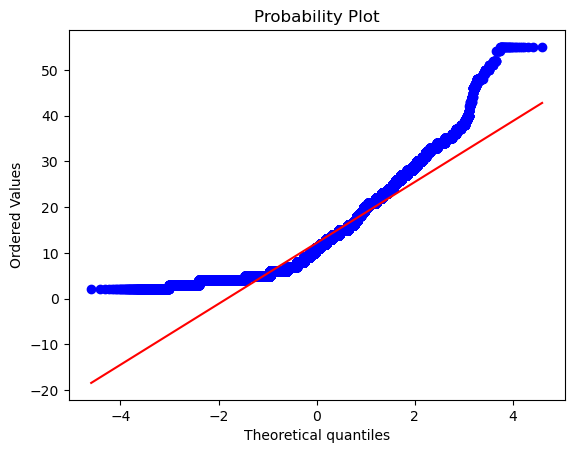

In [63]:
stats.probplot(final_v1['clnt_tenure_yr'], plot=plt)

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

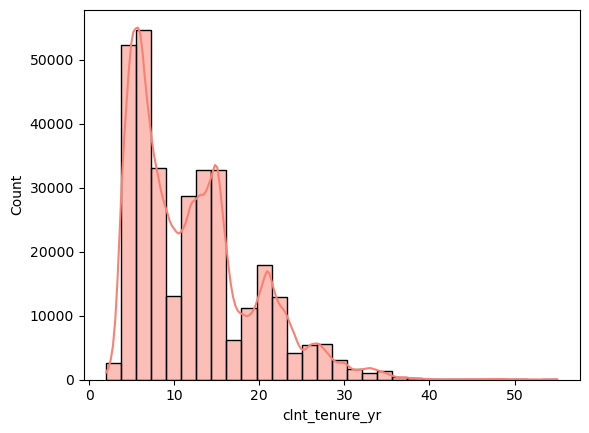

In [55]:
sns.histplot(final_v1['clnt_tenure_yr'], kde=True, bins=30, color="salmon")

In [56]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(final_v1['clnt_tenure_yr'])

shapiro_test_statistic, shapiro_p_value

/opt/anaconda3/envs/major_project/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 321195.
  res = hypotest_fun_out(*samples, **kwds)


(0.913816837586767, 1.1340074033291477e-131)

In [57]:
# print the test result
if shapiro_p_value < 0.05:
    print('The test results indicate that the client tenure year is significantly different from a normal distribution.')
else:
    print('The test results indicate that the client tenure year is not significantly different from a normal distribution.')

The test results indicate that the client tenure year is significantly different from a normal distribution.


<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

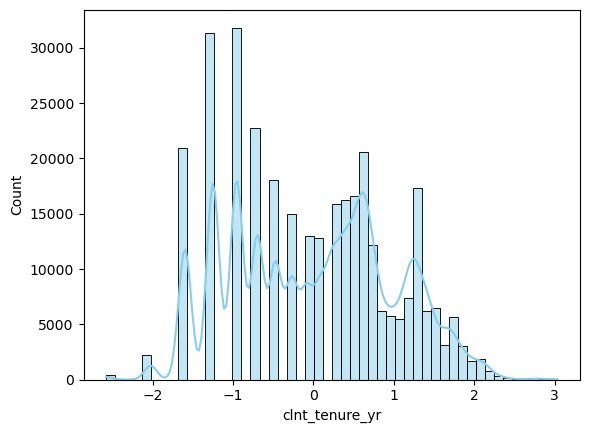

In [59]:
log_transformed_clnt_tenure_yr = np.log1p(final_v1['clnt_tenure_yr'])
standardized_clnt_tenure_yr = (log_transformed_clnt_tenure_yr - log_transformed_clnt_tenure_yr.mean()) / log_transformed_clnt_tenure_yr.std()

# Plotting histogram for transformed 'SalePrice'
sns.histplot(standardized_clnt_tenure_yr, kde=True, bins=50, color="skyblue")

In [61]:
ks_test_statistic_after_transformation, ks_p_value_after_transformation = stats.kstest(standardized_clnt_tenure_yr, 'norm')

ks_test_statistic_after_transformation, ks_p_value_after_transformation

(0.09969940991344645, 0.0)

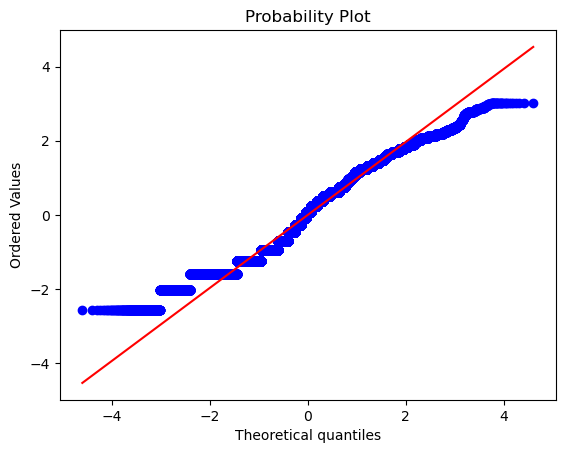

In [62]:
stats.probplot(standardized_clnt_tenure_yr, plot=plt);